# Introdução a física estatística e computacional
## Caminhadas aleatórias
### Luís Felipe Ramos Ferreira - 2019022553

In [81]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [82]:
def generate_random_walk(number_of_walks: np.int32, dimensions: np.int8) -> npt.NDArray[np.float64]:
    random_walks: npt.NDArray[np.float64] = np.random.uniform(low=-0.5, high=0.5, size=(number_of_walks, dimensions))
    positions: npt.NDArray[np.float64] = np.zeros(shape=(number_of_walks, dimensions), dtype=np.float64)
    cum_pos: npt.NDArray[np.float64] = np.zeros(shape=dimensions, dtype=np.float64)
    for i, walk in enumerate(random_walks):
        cum_pos += walk
        positions[i] = cum_pos
    return positions

def plot_positions(positions: npt.NDArray[np.float64], dimensions: np.int8 = 1, show: bool = False) -> None:
    if dimensions == 1:
        plt.plot(positions)
        plt.axhline(y=0, linestyle="dashed", color="black")
        plt.title("Positions per random walk")
        plt.xlabel("Number of walks")
        plt.ylabel("Position")
    else:
        plt.plot(positions[:, 0], positions[:, 1])
        plt.title("Positions per random walk")
        plt.xlabel("Position in X axis")
        plt.ylabel("Position in Y axis")
    if show:
        plt.show()


Geração de 5 caminhadas aleatórias de 10000 passos em 1 dimensão.

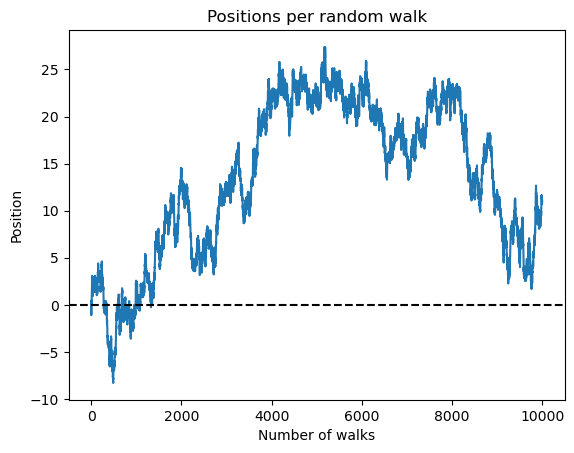

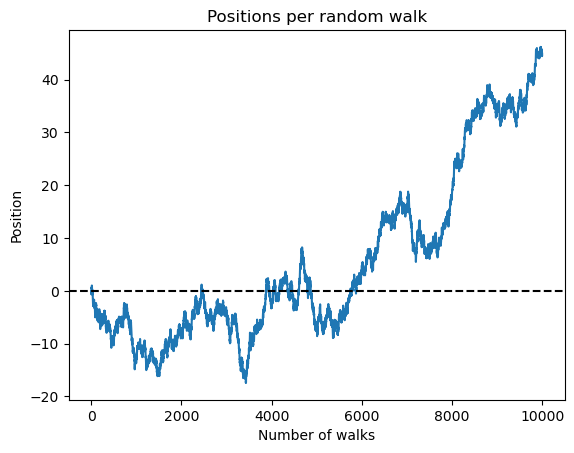

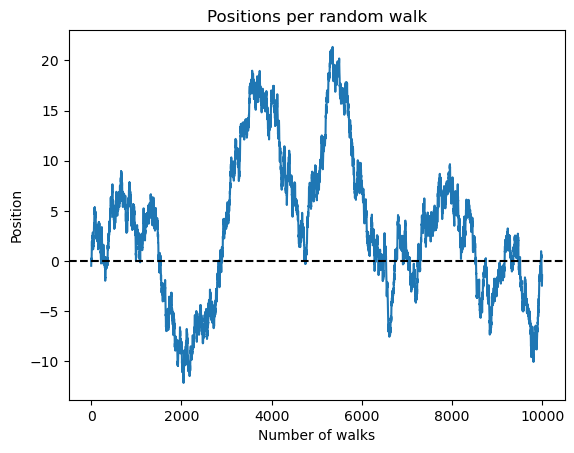

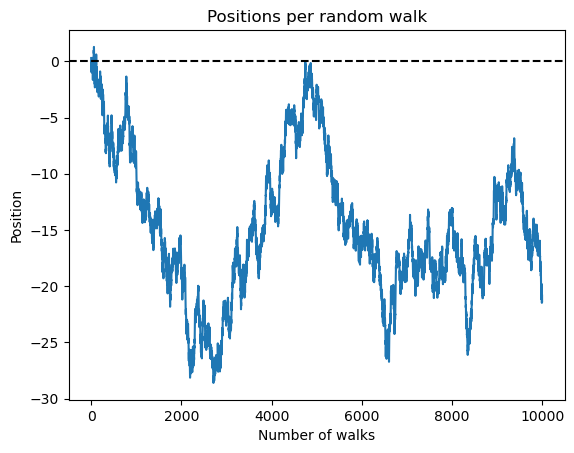

In [83]:
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)

Nesta parte, é interessante notar como algumas caminhadas, nos 10000 passos propostos, se mantêm acima ou abaixo da linha do zero. A primeira, por exemplo, após os primeiros 1800 passos, se mantêm em uma posição positiva até o final. Evidentemente, se essa caminhada continuasse por tempo suficientemente grande, ela iria convergir para a linha da posição 0. No entanto, é interessante notar como existem cenários onde o caminhante pode ficar muito tempo sem cruzar a linha entre posições negativas e positivas.

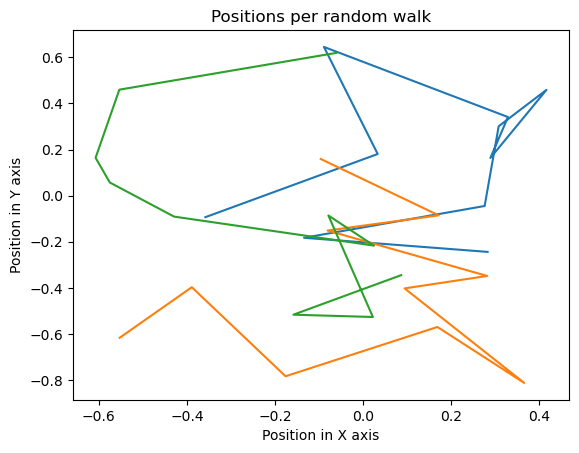

In [84]:
number_of_walks: np.int64 = 10
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

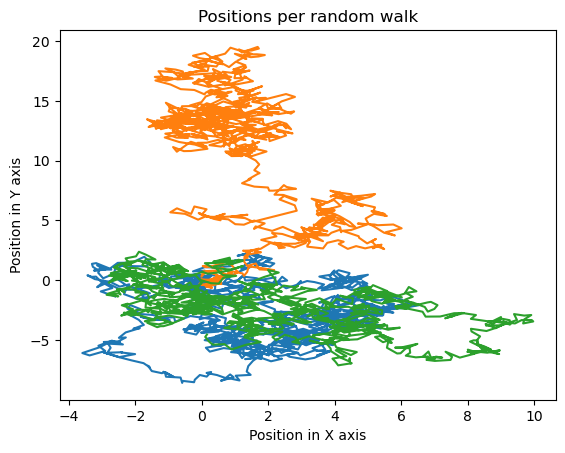

In [85]:
number_of_walks: np.int64 = 1_000
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

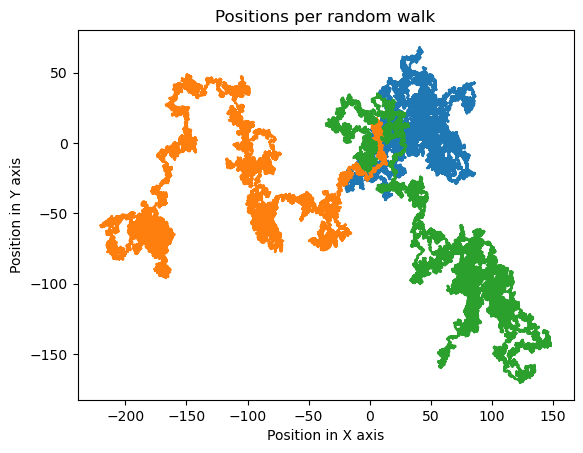

In [86]:
number_of_walks: np.int64 = 100_000
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

In [87]:
def plot_last_positions(
    amount_of_walks: np.int32, number_of_walks: np.int32, show: bool = False
) -> None:
    last_positions: npt.NDArray[np.float64] = np.zeros(
        shape=(amount_of_walks, 2), dtype=np.float64
    )
    for i in np.arange(amount_of_walks):
        last_position: npt.NDArray[np.float64] = generate_random_walk(
            number_of_walks=number_of_walks, dimensions=2
        )[-1]
        last_positions[i] = last_position
    plt.scatter(last_positions[:, 0], last_positions[:, 1], s=0.5, label=f"{number_of_walks}")
    plt.title("Distribuição das posições finais")
    plt.xlabel("Posição no eixo X")
    plt.ylabel("Posição no eixo Y")
    plt.legend(title="Número de passos\n   por caminhada")
    if show:
        plt.show()

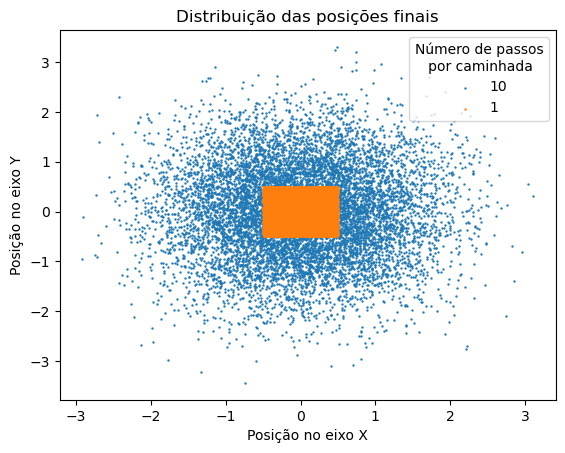

In [88]:
plot_last_positions(amount_of_walks=10_000, number_of_walks=10)
plot_last_positions(amount_of_walks=10_000, number_of_walks=1)
plt.show()

In [89]:
def plot_last_positions_hist(
    amount_of_walks: np.int32,
    number_of_walks: np.int32,
    number_of_bins: np.int32 = 50
) -> None:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    last_positions: npt.NDArray[np.float64] = np.zeros(
        shape=(amount_of_walks, 1), dtype=np.float64
    )
    for i in np.arange(amount_of_walks):
        last_position: npt.NDArray[np.float64] = generate_random_walk(
            number_of_walks=number_of_walks, dimensions=1
        )[-1]
        last_positions[i] = last_position
    ax1.hist(last_positions, bins=number_of_bins)
    ax1.set_title(f"Distribuição das posições finais\n{amount_of_walks} caminhadas\n{number_of_walks} passos por caminhada")
    ax1.set_xlabel("Posição no eixo X")
    ax1.set_ylabel("Posição no eixo Y")
    mean_squared_error: np.float64 = np.average(last_positions ** 2)
    sigma : np.float64 = np.sqrt(10_000) * mean_squared_error
    x: npt.NDArray[np.float64] = np.linspace(-3 * sigma, 3 * sigma, 100)
    res: npt.float64 = np.exp((-1 * x * x)/(2 * sigma * sigma)) / np.sqrt(2 * np.pi * sigma)
    ax2.plot(x, res)
    ax2.set_title(f"Distribuição normal\nMédia = 0 , Desvio padrão = {sigma}")
    plt.show()

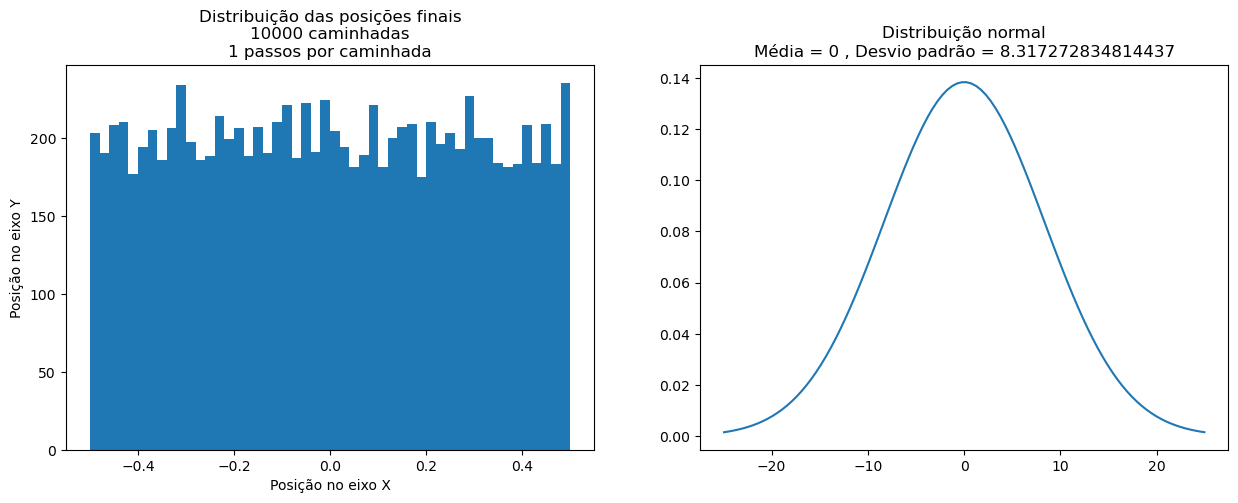

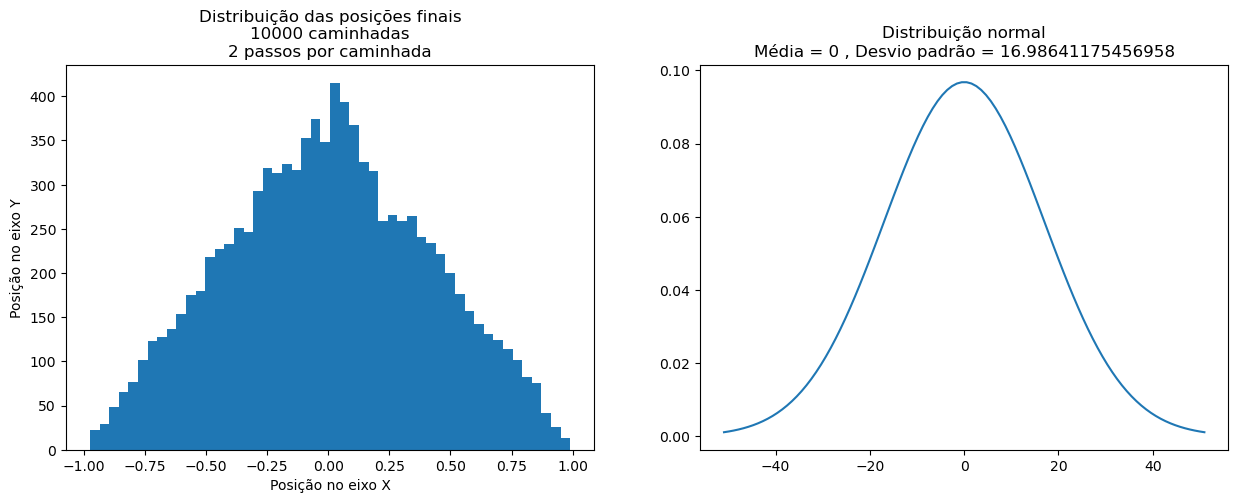

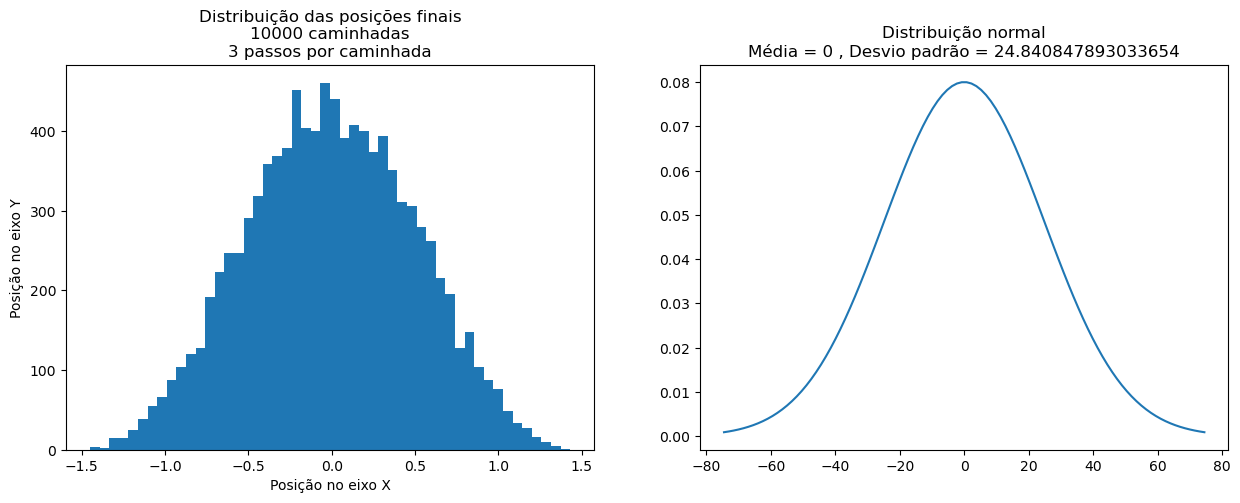

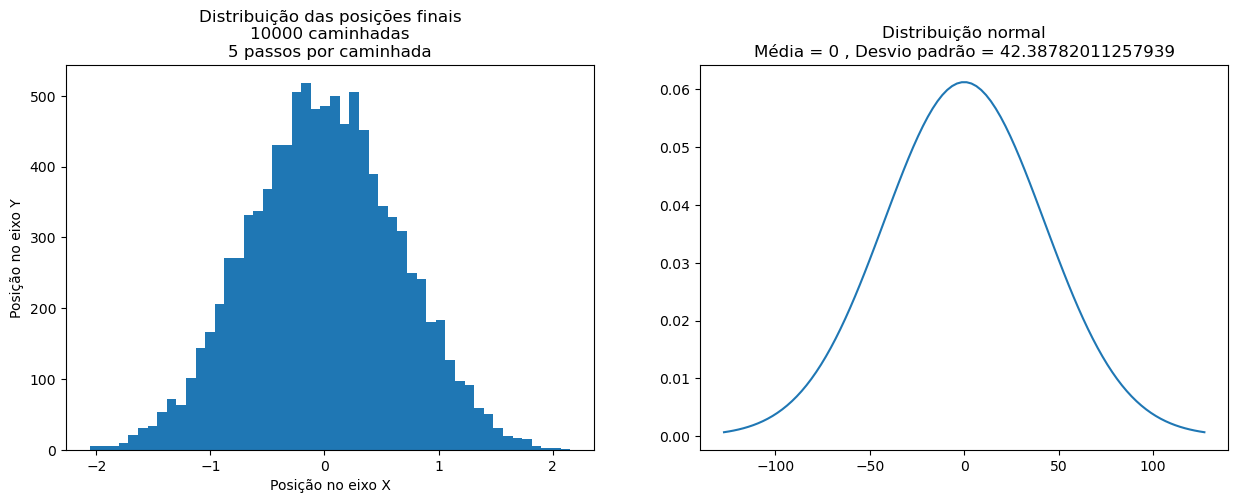

In [90]:
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=1)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=2)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=3)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=5)

Podemos notar claramente, com os gráficos gerados, que a caminhada aleatória converge cada vez mais para uma distribuição normal, conforme aumentasse o número de caminhadas. Para apenas um passo por caminhada, a distribuição de posições finais ainda se parece muito com uma distribuição uniforme. No entanto, conforme mais passos são dados, como no segundo caso, a forma do histograma se aproxima mais do formato de um sino.

Para 5 passos por caminhada, o histograma já extremamente similar à uma distribuição gaussiana e diversas inferências estatísticas já podem ser feitas. Para fins de análise mais porfunda, alguns gráficos foram gerados para um número ainda maior de passos por caminhada, e também para mais caminhadas, e os resultados podem ser vistos abaixo.

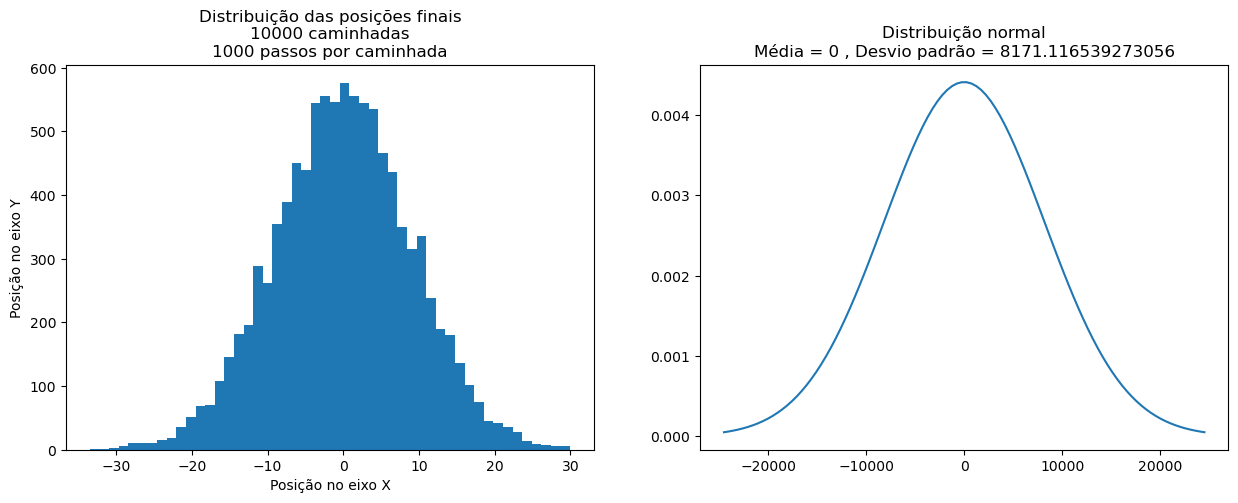

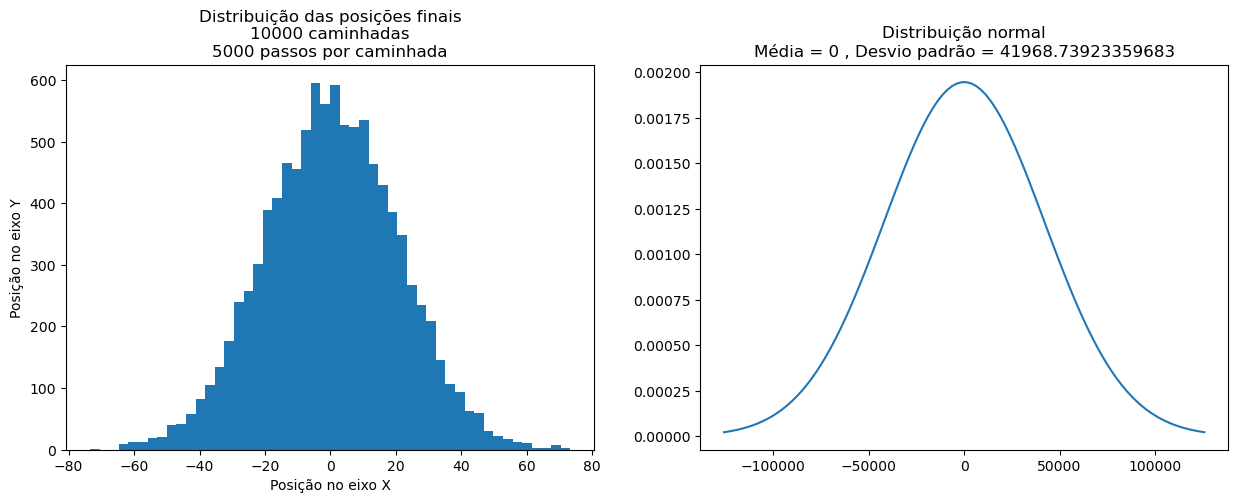

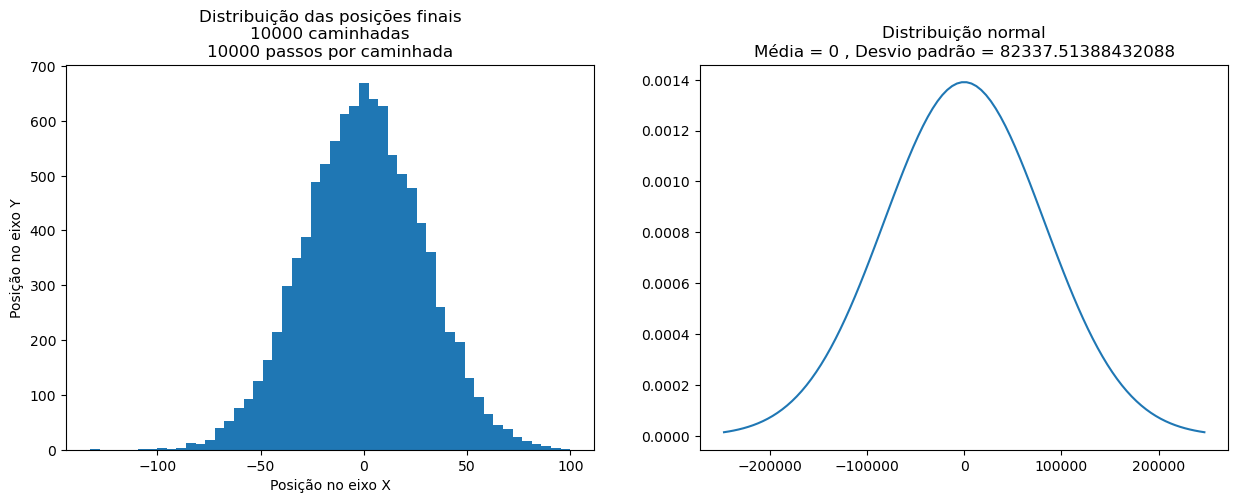

In [91]:
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=1000)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=5000)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=10000)

O aumento do número de passos por caminhada não parece ter causado nenhuma diferença nos formatos do histograma e nem da curva, embora os valores nos eixos tenham se alterado. Isso claramente era esperado visto que mais passos foram dados, o que aumenta o espaço "acessível" pelo caminhante.

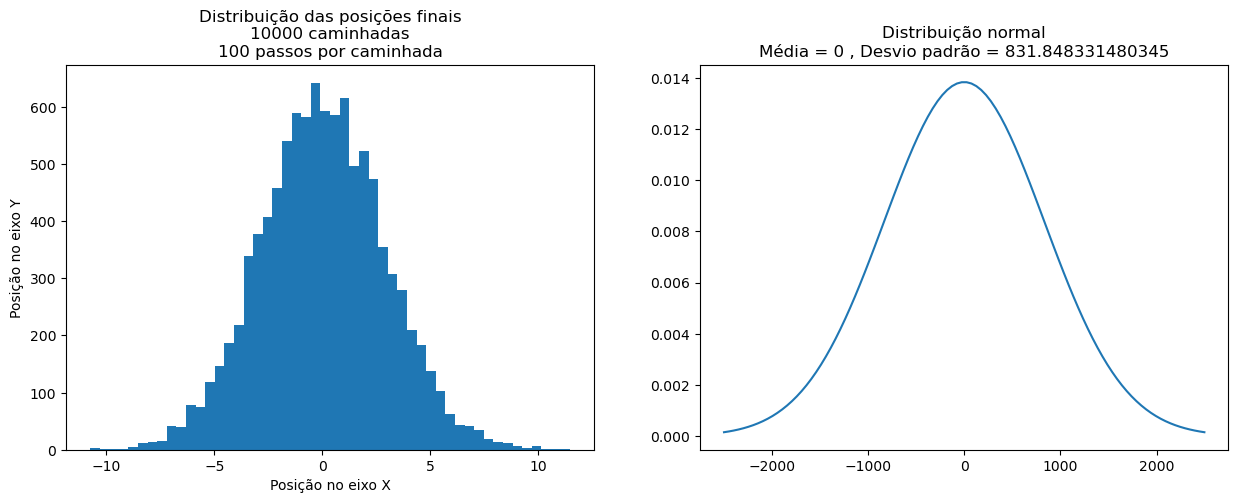

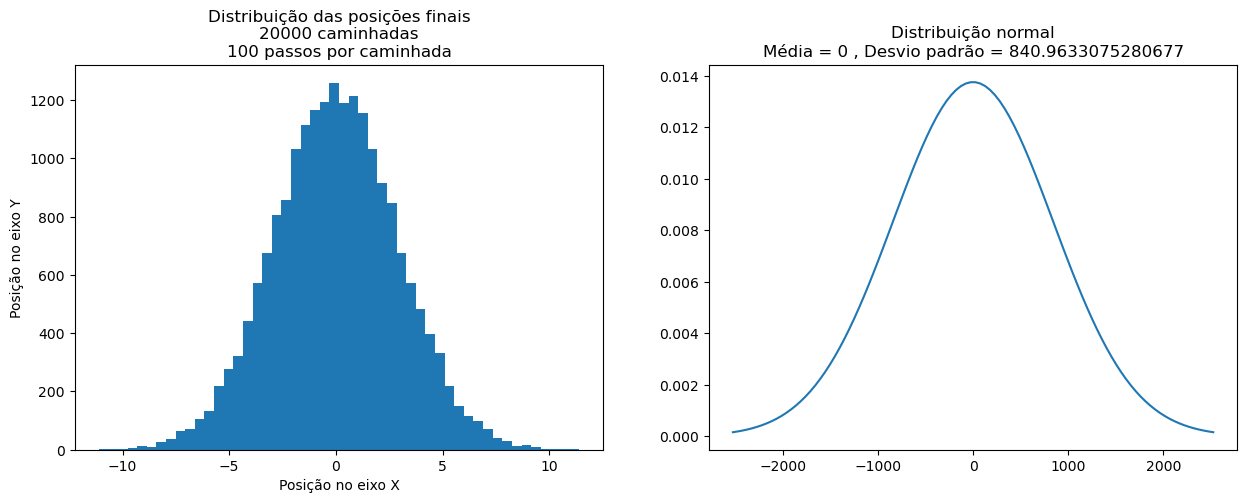

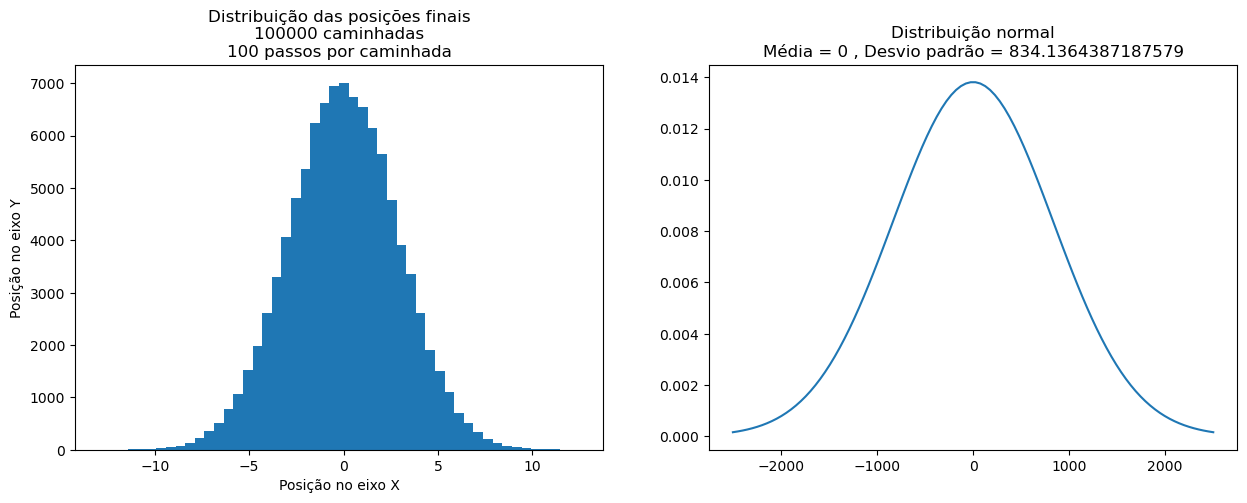

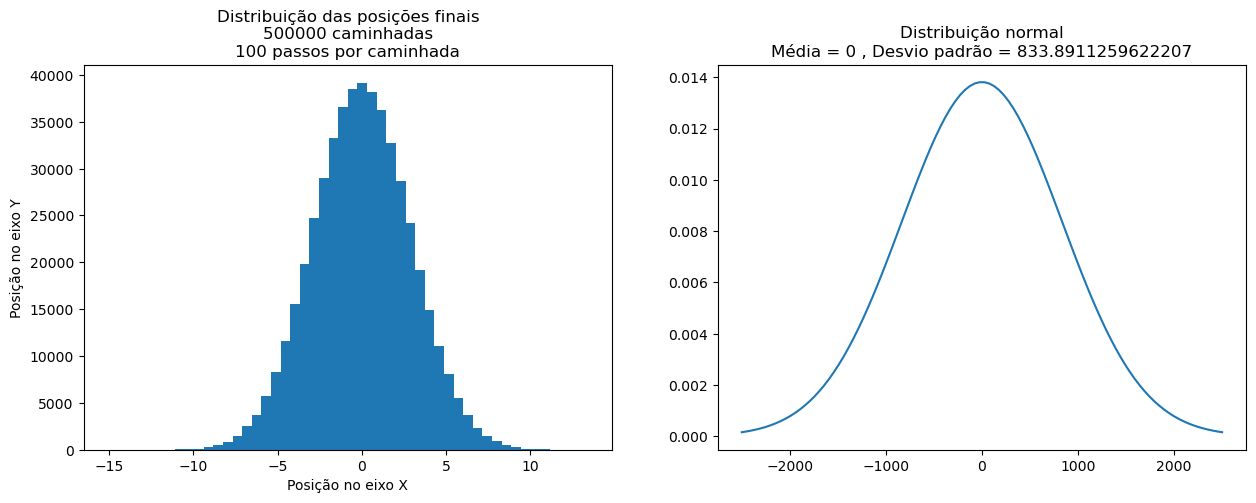

In [92]:
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=100)
plot_last_positions_hist(amount_of_walks=20_000, number_of_walks=100)
plot_last_positions_hist(amount_of_walks=100_000, number_of_walks=100)
plot_last_positions_hist(amount_of_walks=500_000, number_of_walks=100)

Para este experimento, em particular, mantevesse o número de passos por caminhada igual a 100, mas o número de caminhadas foi aumentado consideravelmente para que pudesse ser visto como o gráfico se comportaria. Os resultados foram excelentes. Podemos notar que com o aumento do número de caminhadas utilizadas, o histograma converge cada vez mais para o formato de uma distribuição gaussiana, de modo que, para um número suficientemente grande de caminhadas, podemos inferir que a distribuição seguiria perfeitamente uma distribuição normal.